In [2]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Confidence Intervals

In [4]:
def bootstrap_mean(sample_from_population, label, repetitions):
    resampled_means = []
    for i in np.arange(repetitions):
        resample = sample_from_population.sample()
        mean = np.mean(resample.column(label))
        resampled_means.append(mean)
    return resampled_means

In [5]:
def bootstrap_ci_mean(sample_from_population, label, repetitions):
    resampled_means = bootstrap_mean(sample_from_population, label, repetitions)
    
    interval_95 = make_array(
    percentile(2.5, resampled_means),
    percentile(97.5, resampled_means)
    )
    
    Table().with_column('Resampled mean', resampled_means).hist(0)
    plots.plot(interval_95, [0, 0], color='gold', lw=8)
    print('Approximate 95% Bootstrap Confidence Interval for Population Mean:')
    print(np.round(interval_95, 3))

In [2]:
births = Table.read_table('baby.csv')

In [3]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


Approximate 95% Bootstrap Confidence Interval for Population Mean:
[ 26.884  27.569]


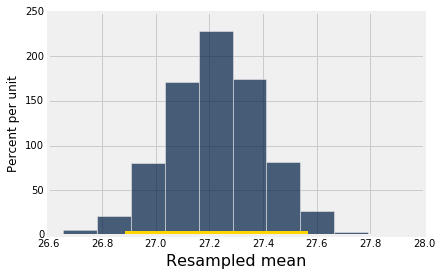

In [6]:
bootstrap_ci_mean(births, 'Maternal Age', 5000)

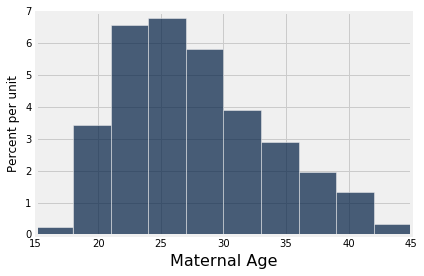

In [7]:
births.hist('Maternal Age')

Approximate 95% Bootstrap Confidence Interval for Population Mean:
[ 118.443  120.527]


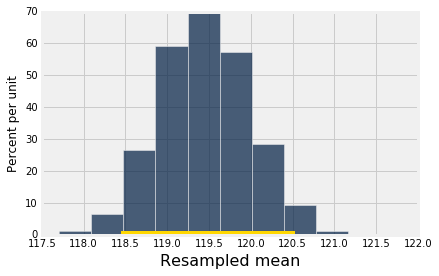

In [10]:
bootstrap_ci_mean(births, 'Birth Weight', 5000)

In [11]:
119.5/16

7.46875

In [18]:
np.mean([0, 0, 1, 1])

0.5

Approximate 95% Bootstrap Confidence Interval for Population Mean:
[ 0.364  0.419]


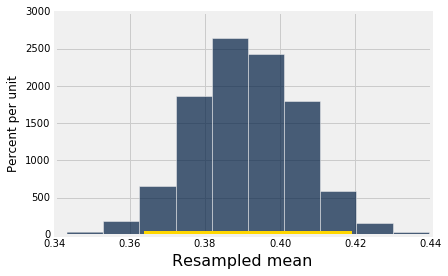

In [12]:
bootstrap_ci_mean(births, 'Maternal Smoker', 5000)

## Means

In [7]:
values = [3, 2, 9, 3]

In [9]:
np.average(values)

4.25

In [11]:
sum(values) / len(values)

4.25

In [23]:
(1/4) * 2 + (2/4) * 3 + (1/4) * 9

4.25

## Bool Values

In [17]:
trials = [True, False, True, True, False]

In [18]:
np.count_nonzero(trials)

3

In [20]:
sum(trials)

3

In [21]:
sum(trials) / len(trials)

0.6

In [22]:
np.mean(trials)

0.59999999999999998

## Standard Deviation

In [25]:
average = np.average(values)
average

4.25

In [33]:
deviations = values - average
t = Table().with_columns(
    'Value', values,
    'Deviation from average', deviations
)
t

Value,Deviation from average
3,-1.25
2,-2.25
9,4.75
3,-1.25


In [28]:
sum(deviations)

0.0

In [30]:
sum(values)

17

In [31]:
len(values) * average

17.0

In [32]:
deviations ** 2

array([  1.5625,   5.0625,  22.5625,   1.5625])

In [34]:
squared_deviations = deviations ** 2
t.with_column('Squared deviation', squared_deviations)

Value,Deviation from average,Squared deviation
3,-1.25,1.5625
2,-2.25,5.0625
9,4.75,22.5625
3,-1.25,1.5625


In [39]:
variance = np.mean(squared_deviations)
variance

7.6875

In [40]:
sd = variance ** 0.5
sd

2.7726341266023544

In [42]:
np.std(values)

2.7726341266023544

## Chebychev

In [44]:
births = Table.read_table('http://inferentialthinking.com/notebooks/baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


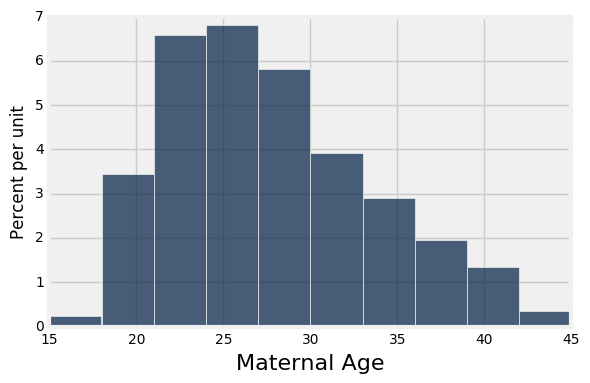

In [45]:
births.hist('Maternal Age')

In [57]:
values = births.column('Maternal Age')
avg = np.average(values)
sd = np.std(values)
print('Average:', avg)
print('SD:', sd)

Average: 27.2282793867
SD: 5.81536040419


In [58]:
births.where('Maternal Age', are.between(avg-2*sd, avg+2*sd)).num_rows / births.num_rows

0.948892674616695

In [59]:
births.where('Maternal Age', are.between(avg-3*sd, avg+3*sd)).num_rows / births.num_rows

0.9991482112436116

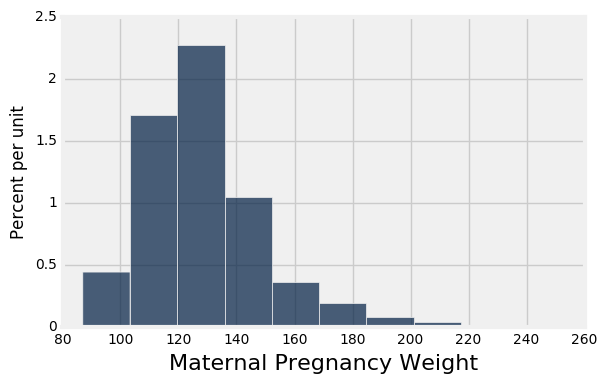

In [56]:
births.hist(4)

In [60]:
values = births.column(4)
avg = np.average(values)
sd = np.std(values)
print('Average:', avg)
print('SD:', sd)

Average: 128.478705281
SD: 20.7254497043


In [62]:
births.where(4, are.between(avg-2*sd, avg+2*sd)).num_rows / births.num_rows

0.9505962521294719

In [63]:
births.where(4, are.between(avg-3*sd, avg+3*sd)).num_rows / births.num_rows

0.9863713798977853